2025-03-22 08:40:14.022 
  command:

    streamlit run C:\Users\mrahm\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


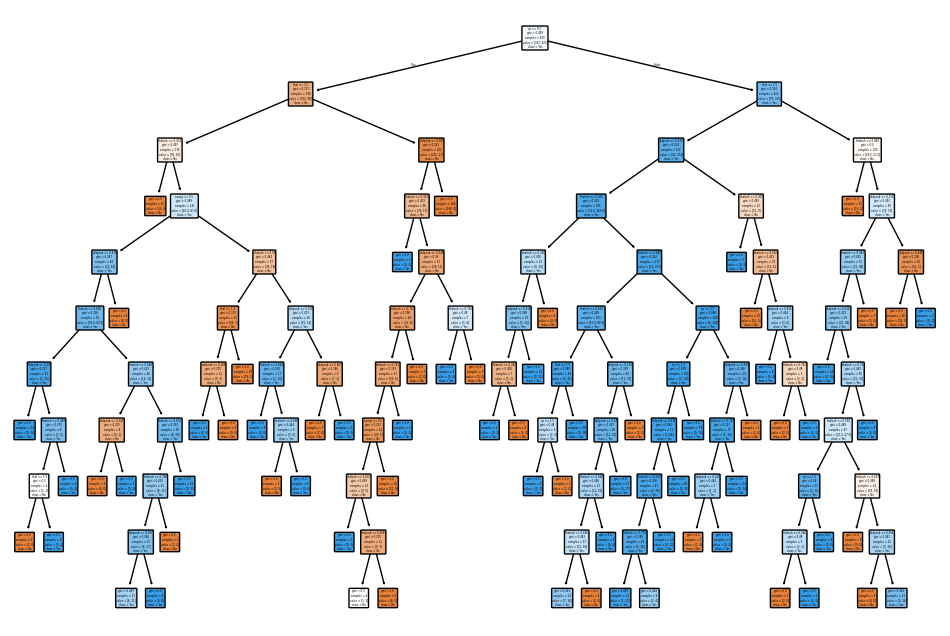

In [20]:
import streamlit as st
import collections
if not hasattr(collections, 'Mapping'):
    import collections.abc
    collections.Mapping = collections.abc.Mapping
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def load_data():
    file_path = r"C:\Users\mrahm\Downloads\heart_disease_project_restructured\data\cleaned_data3.csv"

    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    return pd.DataFrame()


def train_decision_tree(df):
    features = ['cp', 'thal', 'oldpeak', 'exang', 'thalach']
    X = df[features]
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 4, 6]}
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    joblib.dump(best_model, r"C:\Users\mrahm\Downloads\heart_disease\decision_tree_model.pkl")

    return best_model, acc, prec, rec, f1

def plot_data(df, column):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f"Distribution of {column}")
    st.pyplot(fig)

def main():
    st.title("🩺 Heart Disease Risk Prediction")
    
    st.subheader("📊 Decision Tree Training and Performance")
    df = load_data()
    if not df.empty:
        model, acc, prec, rec, f1 = train_decision_tree(df)
        st.write(f"*Best Model Parameters:* {model.get_params()}")
        st.write(f"*Accuracy:* {acc:.2f}")
        st.write(f"*Precision:* {prec:.2f}")
        st.write(f"*Recall:* {rec:.2f}")
        st.write(f"*F1 Score:* {f1:.2f}")
        
        st.subheader("🌳 Decision Tree Visualization")
        fig, ax = plt.subplots(figsize=(12, 8))
        plot_tree(model, feature_names=['cp', 'thal', 'oldpeak', 'exang', 'thalach'], class_names=["No", "Yes"], filled=True, rounded=True, ax=ax)
        st.pyplot(fig)
    else:
        st.warning("No data available yet. Please upload or generate dataset.")
if __name__ == "__main__":

    main()